# Analisys of the results of Evolutionary simulations
The results of the Evolutionary simulations are subdivided into three documents that contain different scales of information of the populations:

## 1. Individual Information
Its contain the information of the 10% of the populations, some of this information are related to the genotype and phenotype of the individuals.

In [1]:
import matplotlib.pyplot as plt
from copy import copy
import numpy.matlib
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import numpy as np
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp
import pandas as pd
from time import time
files = "_u0.03_M1.1_g1_st1_N1000_v0.3_alg0_0"
def data_conv(data):
    for i in range(len(data)):
        data[i]=np.array(np.mat(data[i]))[0].astype("float")
    return data

In [2]:
resultI = pd.read_csv("Result/Ind_inf"+files+".csv")

resultI

,Unnamed: 0,Generation,Cell tag,Expresion and repression,Constant of light rate,Disociation Constants,Hill exponents,Fitness,WCCn,Time,Parent tag
0,0,1.0,0,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ],0.155335,[0.1235 0.1734 0.2125 0.2447 0.271 ],[0. 0.5 1.01 1.52 2. ],0
1,1,1.0,10,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ],0.155335,[0.1235 0.1734 0.2125 0.2447 0.271 ],[0. 0.5 1.01 1.52 2. ],0
2,2,1.0,20,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ],0.155335,[0.1235 0.1734 0.2125 0.2447 0.271 ],[0. 0.5 1.01 1.52 2. ],0
3,3,1.0,30,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ],0.155335,[0.1235 0.1734 0.2125 0.2447 0.271 ],[0. 0.5 1.01 1.52 2. ],0
4,4,1.0,40,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ],0.155335,[0.1235 0.1734 0.2125 0.2447 0.271 ],[0. 0.5 1.01 1.52 2. ],0
...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,5000.0,950,[1.55410319e+00 1.24830463e+00 8.35849942e+01 ...,0.255474,[0.04008121 0.21851153 0.04508249 8.07125401 5...,[3.04001864 7.18388367 4.67684133 2.68725319],0.045017,[0.9513 1.0173 1.0816 1.1477 1.2132],[ 9998.00337592 9998.51 9999. ...,156
499996,499996,5000.0,960,[1.55410319e+00 1.24830463e+00 8.35849942e+01 ...,0.255474,[0.04008121 0.21851153 0.04508249 8.07125401 5...,[3.04001864 7.18388367 4.67684133 2.68725319],0.045017,[0.9513 1.0173 1.0816 1.1477 1.2132],[ 9998.00337592 9998.51 9999. ...,116
499997,499997,5000.0,970,[1.55410319e+00 1.24830463e+00 9.36204283e+01 ...,0.271632,[0.041984 0.21851153 0.0442692 7.80199686 5...,[2.91773082 7.83324784 4.1373493 3.29314728],0.049347,[1.2195 1.3111 1.3968 1.4813 1.5617],[ 9998.00337592 9998.51 9999. ...,326
499998,499998,5000.0,980,[1.63845250e+00 1.42254535e+00 1.00768049e+02 ...,0.226184,[4.27706929e-02 2.76302304e-01 4.42666445e-02 ...,[3.00046156 6.51859888 3.63860342 3.05468603],0.034802,[0.1559 0.1519 0.1497 0.1493 0.1512],[ 9998.00337592 9998.51 9999. ...,42


In [3]:
resultA = pd.read_csv("Result/AveGenSub"+files+".csv")

resultA

,Unnamed: 0,Generation,Expresion and repression constants,Constant of light rate,Disociation constants,Hill exponents,WCC,Fitness
0,0,1.0,[1.52867968e+00 1.09687446e+00 7.74557361e+01 ...,0.245961,[0.04267115 0.21690443 0.04508434 8.87863026 4...,[2.19644918 6.67193651 4.38830667 2.90134711],0.207739,0.185345
1,1,2.0,[1.52851986e+00 1.09695512e+00 7.74518134e+01 ...,0.245978,[0.04267882 0.21690443 0.04508506 8.87821686 4...,[2.19642977 6.67114822 4.3882551 2.90149838],0.316690,0.117183
2,2,3.0,[1.52876695e+00 1.09709518e+00 7.74642297e+01 ...,0.245975,[0.04267745 0.21690445 0.04508364 8.87862483 4...,[2.19642593 6.67006487 4.38873422 2.90204054],0.381144,0.066444
3,3,4.0,[1.52858063e+00 1.09702178e+00 7.74648495e+01 ...,0.245963,[0.04268053 0.21691637 0.04507826 8.87923438 4...,[2.19694059 6.66974506 4.38867654 2.90174563],0.413848,0.043440
4,4,5.0,[1.52846962e+00 1.09697043e+00 7.74542896e+01 ...,0.245967,[0.04268294 0.21690443 0.04507486 8.87822511 4...,[2.19691834 6.66915429 4.38896696 2.90107572],0.429289,0.033288
...,...,...,...,...,...,...,...,...
4995,4995,4996.0,[1.60196832e+00 1.34527661e+00 9.46325069e+01 ...,0.247904,[4.22938584e-02 2.44352788e-01 4.51359800e-02 ...,[2.91534571 7.23036699 4.00741754 3.17625477],0.485339,0.044434
4996,4996,4997.0,[1.60164417e+00 1.34820944e+00 9.46044427e+01 ...,0.247398,[4.23258082e-02 2.44459639e-01 4.51053897e-02 ...,[2.91456742 7.21202897 4.00673513 3.16260163],0.487490,0.033764
4997,4997,4998.0,[1.60227480e+00 1.34872658e+00 9.44640547e+01 ...,0.247905,[4.22374836e-02 2.43966804e-01 4.50755479e-02 ...,[2.91386273 7.212054 4.00706377 3.14925251],0.493754,0.029684
4998,4998,4999.0,[1.60362675e+00 1.34707006e+00 9.45167467e+01 ...,0.247935,[4.23552131e-02 2.44258245e-01 4.50299763e-02 ...,[2.91474908 7.21884263 4.00536036 3.15956372],0.595712,0.030358


In [4]:
resultL = pd.read_csv("Result/LineagexCycle"+files+".csv")

resultL

,Unnamed: 0,Generation,LTag,LMut,LFit,Fitness,WCC,LOsc,Lm,Expresion and repression,Constant of light rate,Disociation Constants,Hill exponents
0,0,24.0,22,0,0.132158,[0.30187935 0.19176374 0.17622697 0.15590947 0...,[0.1734 0.2125 0.2447 0.271 0.2954 0.318 0.3...,2,[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -...,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ]
1,1,24.0,758,0,0.132158,[0.30187935 0.19176374 0.17622697 0.15590947 0...,[0.1734 0.2125 0.2447 0.271 0.2954 0.318 0.3...,2,[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -...,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ]
2,2,24.0,828,0,0.132158,[0.30187935 0.19176374 0.17622697 0.15590947 0...,[0.1734 0.2125 0.2447 0.271 0.2954 0.318 0.3...,2,[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -...,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ]
3,3,24.0,832,0,0.132158,[0.30187935 0.19176374 0.17622697 0.15590947 0...,[0.1734 0.2125 0.2447 0.271 0.2954 0.318 0.3...,2,[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -...,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ]
4,4,24.0,955,0,0.132158,[0.30187935 0.19176374 0.17622697 0.15590947 0...,[0.1734 0.2125 0.2447 0.271 0.2954 0.318 0.3...,2,[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -...,[1.52869538e+00 1.09686638e+00 7.74451588e+01 ...,0.245971,[0.04267039 0.21690443 0.04508541 8.87863026 4...,[2.19646732 6.67193651 4.38855201 2.9016897 ]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207995,207995,4992.0,572,0,0.148938,[0.60080891 0.65993827 0.95118071 0.89474739 0...,[2.3328 2.1641 2.0278 1.8558 1.379 0.6458 0.3...,2,[ 1. 1. 1. -1. 1. 1. 1. 1. 1. -1. -1. -...,[1.57180976e+00 1.50025221e+00 8.71249866e+01 ...,0.235582,[3.78995854e-02 2.54106200e-01 4.26903936e-02 ...,[2.68707047 6.35161923 3.86812076 3.20409067]
207996,207996,4992.0,993,0,0.160366,[0.3665775 0.22401843 0.19978714 0.17322395 0...,[0.3338 0.3466 0.3657 0.3874 0.4085 0.4286 0.4...,2,[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -...,[1.55410319e+00 1.24830463e+00 8.35849942e+01 ...,0.255474,[0.03702043 0.21851153 0.04508249 7.80199686 5...,[3.04001864 7.83324784 4.35087648 2.68725319]
207997,207997,4992.0,225,0,0.134730,[0.1854696 0.16801989 0.15152603 0.13372139 0...,[0.0888 0.0895 0.0928 0.0985 0.1067 0.1178 0.1...,2,[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -...,[1.55410319e+00 1.24830463e+00 9.33713504e+01 ...,0.290284,[0.03711545 0.21851153 0.04508249 7.80199686 5...,[3.04001864 7.83324784 3.81761336 2.95755926]
207998,207998,4992.0,892,1,0.152624,[0.36991361 0.21955284 0.19665646 0.17119328 0...,[0.3147 0.3296 0.351 0.375 0.3981 0.4197 0.4...,2,[-1. -1. -1. -1. -1. 1. -1. -1. -1. -1. -1. -...,[1.54327080e+00 1.15606858e+00 8.99239907e+01 ...,0.259159,[0.04008121 0.21851153 0.0482559 7.80199686 5...,[3.02745355 7.83324784 4.67132679 2.54513262]


In [5]:
mx = int(resultL["Generation"].max()/24)
N = len(resultL["Generation"][resultL["Generation"]==24])
s = int(mx/20)+1


rW = np.array(resultI["WCCn"])
rT = np.array(resultI["Time"])
count=[]
for i in range(len(rW)):
    try:
        rW[i]=list(np.array(np.mat(rW[i]))[0])
        rT[i]=list(np.array(np.mat(rT[i]))[0])
    except:
        count.append(i)
        print(i)

- Graphics the fitness as points through generations and as an histogram.

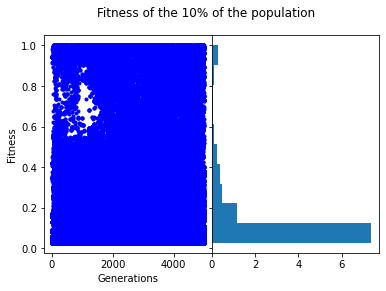

In [6]:
fig, ax = plt.subplots(1,2,sharey=True)
ax[0].plot(resultI["Generation"][resultI["Fitness"]!=0],resultI["Fitness"][resultI["Fitness"]!=0],".b")
ax[0].set_xlabel("Generations")
ax[0].set_ylabel("Fitness")
fig.suptitle("Fitness of the 10% of the population")
ax[1].hist(resultI["Fitness"][resultI["Fitness"]!=0],orientation="horizontal",density=True)
plt.subplots_adjust(wspace=0)
plt.savefig("Result/Fitness_Ind"+files+".jpg")
plt.show()

- Graphics the concentration of WCC protein divided into 10 at differents forms, firsts graphics are the polyfit data and its standar deviation error, the lasts graphics are the raw data, both kind of graphics change its color each two oscillation cycles.

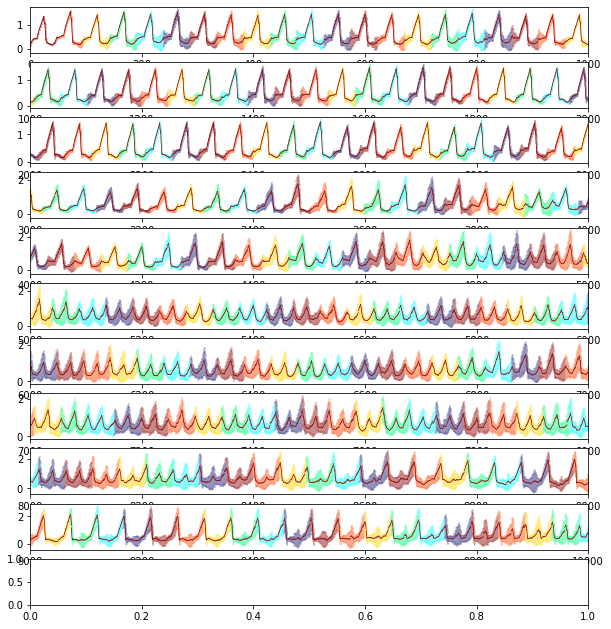

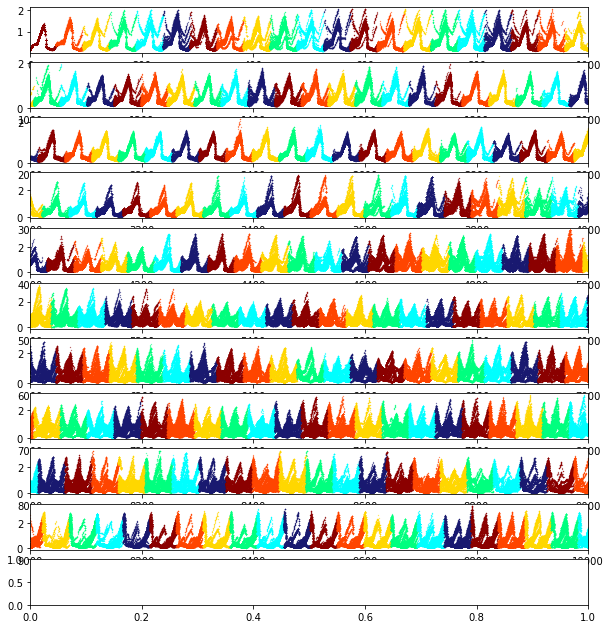

In [7]:
count=500
ss = len(resultI["Generation"][resultI["Generation"]==1])
figsi = int(resultI["Generation"].max()/count)+1
color=["darkred","orangered","gold","springgreen","cyan","midnightblue"]
fig1, ax1 = plt.subplots(figsi,figsize=(10,figsi))
fig2, ax2 = plt.subplots(figsi,figsize=(10,figsi))

for i in range(1,int(resultI["Generation"].max())+1):
    
    x,y = list(rT[(i-1)*ss:i*ss]),list(rW[(i-1)*ss:i*ss])
    x,y = np.array(x).reshape(5*ss),np.array(y).reshape(5*ss)
    # fit a linear curve and estimate its y-values and their error.
    a,b,c = np.polyfit(x, y, deg=2)
    y_est = a*x**2 + b*x + c
    y_err = np.sqrt(np.sum((y - y_est)**2)/len(y))
    
    ax1[(i-1)//500].plot(pd.unique(x), pd.unique(y_est), '-',color="darkred",
                         linewidth=0.7)#markersize=.5)
    ax1[(i-1)//500].fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2,color=color[i//24%6])
    
    
    
    
    ax2[(i-1)//500].plot(x, y, '.', color=color[i//24%6],markersize=.5)
    
    if count==i:
        ax1[(i-1)//500].set_xlim((i-500)*2,i*2)
        #ax1[(i-1)//500].set_ylim([0,20])
        ax2[(i-1)//500].set_xlim((i-500)*2,i*2)
        #ax2[(i-1)//500].set_ylim([0,20])
        count += 500
    
plt.show()


In [8]:
figsi

11

- Graphic to a better visualizate of the raw data at certain time span.

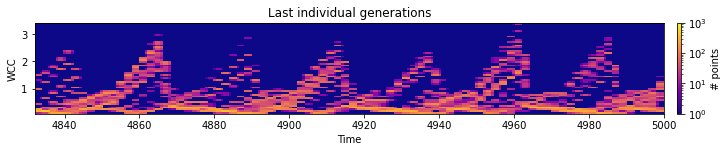

In [9]:
fig, axes = plt.subplots(1, figsize=(10, 2), layout='constrained')
start=int(resultI["Generation"].max()-168)
#start=0
time = 168
num_fine = time*10
arr = 20
x_fine = list(np.linspace(start, start+time, num_fine).reshape(num_fine//arr,arr))
y_fine = np.empty((time*ss//2, 20), dtype=float)
for i in range(time*ss//2):
    y_fine[i, :] = np.interp(x_fine[i//ss], rT[start*ss+i], rW[start*ss+i])
y_fine = y_fine.flatten()
for i in range(num_fine//arr):
    x_fine[i] = np.matlib.repmat(x_fine[i], ss, 1).flatten()
x_fine = np.array(x_fine).flatten()


# Plot (x, y) points in 2d histogram with log colorscale
# It is pretty evident that there is some kind of structure under the noise
# You can tune vmax to make signal more visible
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[240,50])
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmax=ss*10), rasterized=True)
axes.set_xlabel("Time")
axes.set_ylabel("WCC")
fig.colorbar(pcm, ax=axes, label="# points", pad=0)
axes.set_title("Last individual generations")

plt.savefig("Result/Last individual generations"+files+".jpg")
plt.show()

- Correlation and autocorrelation of the WCC protein concentrations.

In [10]:
#color=["darkred","orangered","gold","springgreen","cyan","midnightblue"]
#fig1, ax1 = plt.subplots(10,figsize=(9,18))
#fig2, ax2 = plt.subplots(10,figsize=(9,18))
#n = int(resultI["Generation"].max()/10)
#for i in range(10):
#    x,y = list(rT[i*n:(i+1)*n]),list(rW[i*n:(i+1)*n])
#    x,y = np.array(x).reshape(n*5),np.array(y).reshape(n*5)
#        
#    ax1[i].xcorr(x, y, usevlines=False, maxlags=1000, normed=True)
#    ax1[i].grid(True)

#    ax2[i].acorr(y, usevlines=False, maxlags=1000, normed=True)
#    ax2[i].grid(True)
    
#plt.show()

- Graphics of the genotype parameters.

In [11]:
a=len(resultI["Expresion and repression"])
ERkI = [[0]*23]*a
for i in range(a):
    ERkI[i] = np.array(np.mat(resultI["Expresion and repression"][i]))[0]
ERkI = np.array(ERkI)
    
DkmI = [[0]*7]*a
for i in range(a):
    DkmI[i] = np.array(np.mat(resultI["Disociation Constants"][i]))[0]
DkmI = np.array(DkmI)

nHI = [[0]*4]*a
for i in range(a):
    nHI[i] = np.array(np.mat(resultI["Hill exponents"][i]))[0]
nHI = np.array(nHI)

In [12]:
inER=data_conv(pd.unique(resultL["Expresion and repression"][:N][resultL["LMut"][:N]==0]))
inDk=data_conv(pd.unique(resultL["Disociation Constants"][:N][resultL["LMut"][:N]==0]))
inHexp=data_conv(pd.unique(resultL["Hill exponents"][:N][resultL["LMut"][:N]==0]))
inLight = pd.unique(resultL["Constant of light rate"][:N][resultL["LMut"][:N]==0])

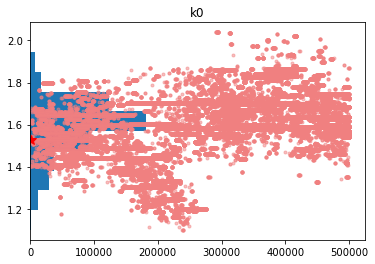

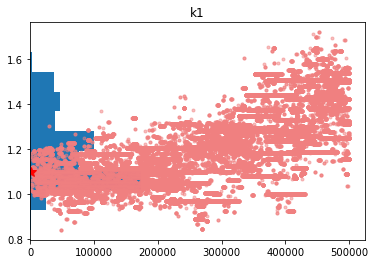

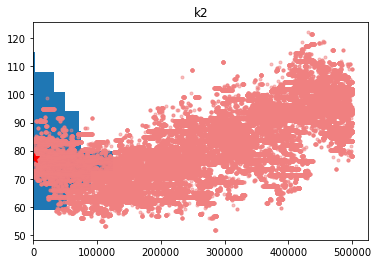

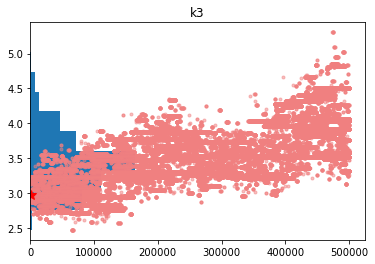

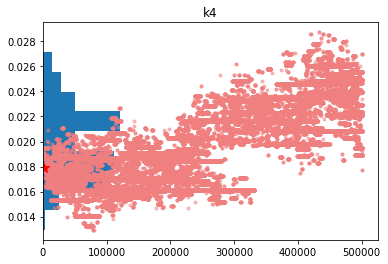

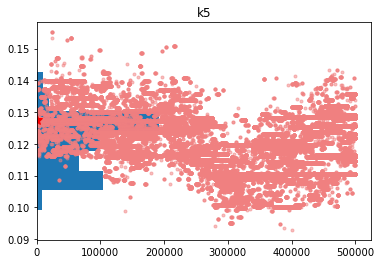

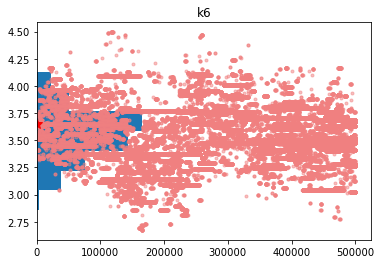

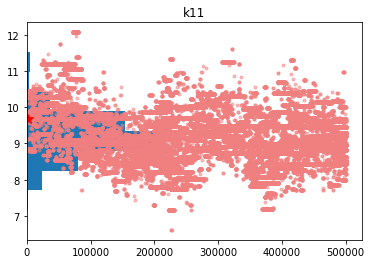

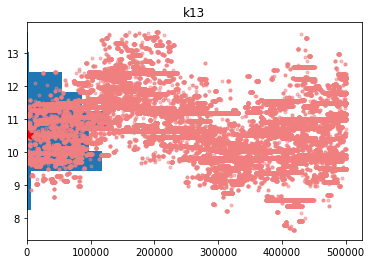

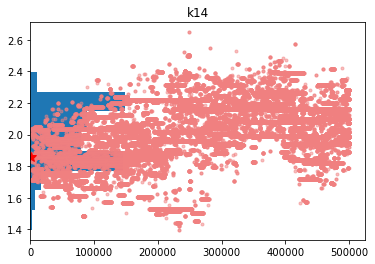

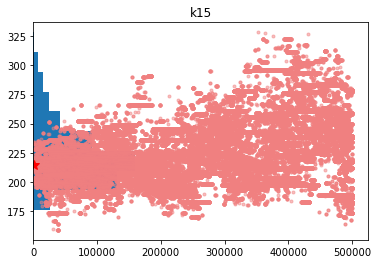

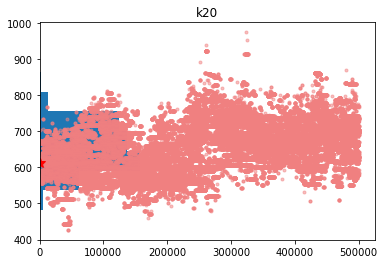

In [13]:
for i in range(0,23):
    if not i in [7,8,9,10,12,16,17,18,19,21,22]:
        plt.plot(ERkI[:,i],'.',color="lightcoral",alpha=0.5)
        plt.hist(ERkI[:,i],orientation="horizontal")
        for j in range(len(inER)):
            plt.plot(N,inER[j][i],"r*",alpha=1,markersize=10)
        plt.title("k{}".format(i))
        plt.savefig("Result/k{}_Ind{}.jpg".format(i,files))
        plt.show()

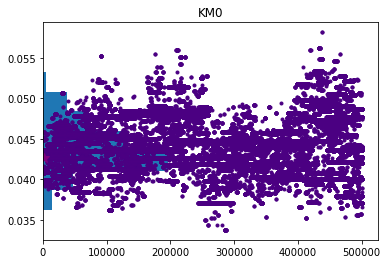

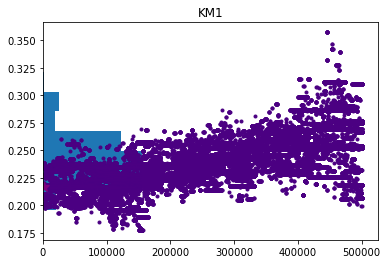

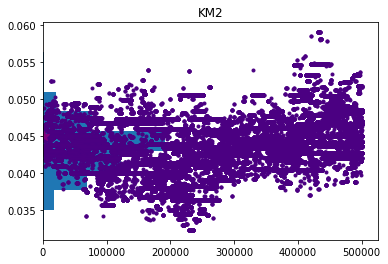

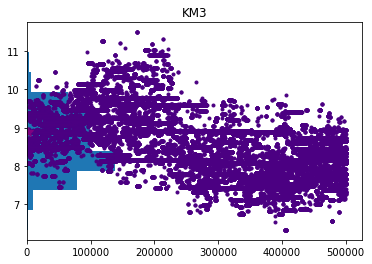

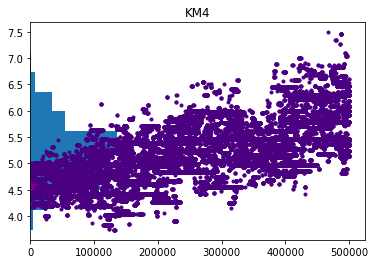

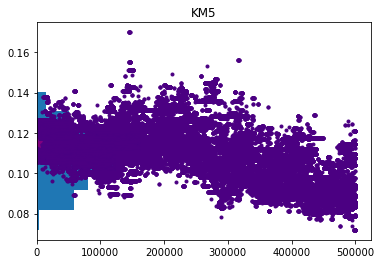

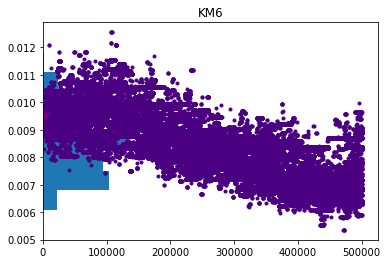

In [14]:
for i in range(0,7):
    plt.plot(DkmI[:,i],'.',color="indigo")
    plt.hist(DkmI[:,i],orientation="horizontal")
    for j in range(len(inDk)):
            plt.plot(N,inDk[j][i],"*",color="purple",alpha=1,markersize=10)
    plt.title("KM{}".format(i))
    plt.savefig("Result/KM{}_Ind{}.jpg".format(i,files))
    plt.show()

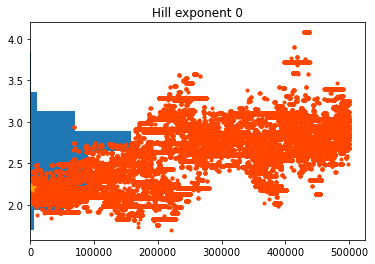

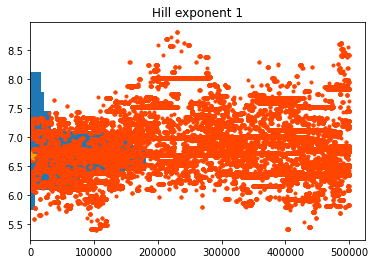

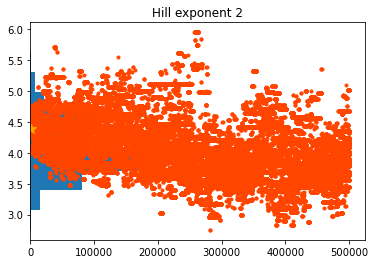

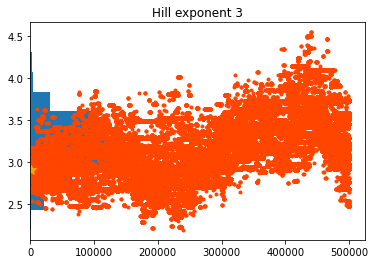

In [15]:
for i in range(0,4):
    plt.plot(nHI[:,i],'.',color="orangered")
    plt.hist(nHI[:,i],orientation="horizontal")
    for j in range(len(inHexp)):
            plt.plot(N,inHexp[j][i],"*",color="orange",alpha=1,markersize=10)
    plt.title("Hill exponent {}".format(i))
    plt.savefig("Result/Hill_exp{}_Ind{}.jpg".format(i,files))
    plt.show()

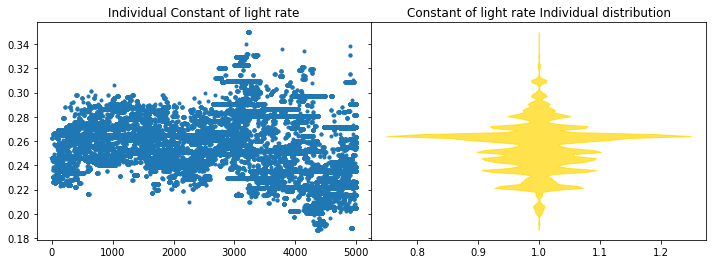

In [16]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,4))
ax[0].plot(resultI["Generation"],resultI["Constant of light rate"],".")
ax[0].set_title("Individual Constant of light rate")
ax[0].scatter(np.ones_like(inLight),inLight,s=50,c="skyblue",marker="*")
vp=ax[1].violinplot(resultI["Constant of light rate"],showextrema=False)
for body in vp['bodies']:
    body.set_color("gold")
    body.set_alpha(0.7)
plt.title("Constant of light rate Individual distribution")
plt.subplots_adjust(wspace=0)
plt.savefig("Result/Light_Ind"+files+".jpg")
plt.show()

## 2. Average Generation Information
Its contain the average information of the populations at each generation.

- Fitness and WCC protein concentration through each generation, and last is the comparation of the both.

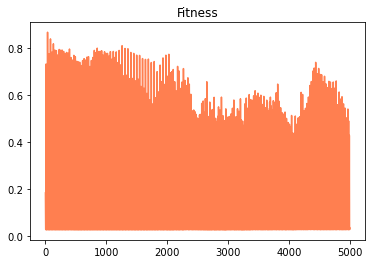

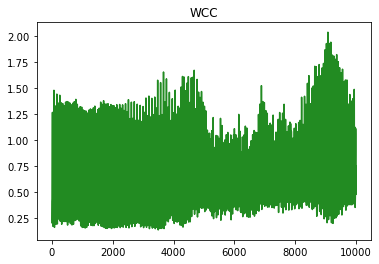

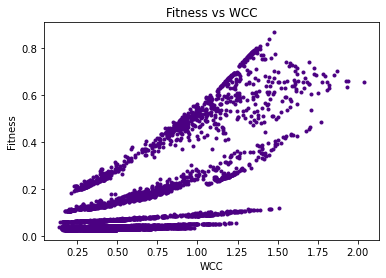

In [50]:
plt.figure()
plt.plot(resultA["Generation"][resultA["Fitness"]!=0],resultA["Fitness"][resultA["Fitness"]!=0]
         ,'-',color='coral')
#plt.vlines(range(0,len(resultA["Fitness"]),24),0,max(resultA["Fitness"]))
plt.title("Fitness")
plt.savefig("Result/Fitness_Ave"+files+".jpg")
plt.show()

plt.figure()
plt.plot(range(0,len(resultA["WCC"])*2,2),resultA["WCC"],'-',color='forestgreen')
#plt.vlines(range(0,len(resultA["WCC"])*2,48),0,max(resultA["WCC"]))
plt.title("WCC")
#plt.ylim([0,12])
plt.savefig("Result/WCC_Ave"+files+".jpg")
plt.show()

plt.figure()
plt.plot(resultA["WCC"][resultA["Fitness"]!=0],resultA["Fitness"][resultA["Fitness"]!=0]
         ,'.',color='indigo')
plt.title("Fitness vs WCC")
#plt.xlim([0,12])
plt.xlabel("WCC")
plt.ylabel("Fitness")
plt.savefig("Result/WCC vs Fitness"+files+".jpg")
plt.show()

In [18]:
def ODE(tm,y):
    def f_m(P_1,P_2,K_m):
        return (P_1 + P_2 + K_m -  np.sqrt(pow(float(P_1 + P_2 + K_m),2) - 4*P_1*P_2))/2
            
    wc1 = y[0]
    wc2 = y[1]
    WC1 = y[2]
    WC2 = y[3]
    WCCc = y[4]
    WCCn = y[5]
    laWCC = y[6]
    frq = y[7]
    FRQ = y[8]
    FFC = y[9]
    FFCp = y[10]
    FFCn = y[11]
    vvd = y[12]
    VVDc = y[13]
    VVDn = y[14]
    
    k=[1.19,1.2,90,1.6,0.03,0.226,0.8,1,0.472,0.3,0.001,0.6,0.001,20,7.3,320,0.19,0.15,0.1,0.1,800,0.68,0.3]
    L=0.2
    n=[4,4,4,4]
    K=[0.03,1,0.475,5,0.1,0.18,0.02]
    kd=[2.4,2.5,0.135,0.085,0.05,0.05,6,2,0.27,0.27,0.27,0.27,6.2,0.24,0.24]
    
    #Tiempo y periodos LD
    m=tm%24
    if m>=12:
        l = 0
    else:
        l = L

    #Ecuaciones        
    dwc1 = k[0] + k[1]*WCCn + k[2]*laWCC - kd[0]*wc1
    dwc2 = k[3]/(1 + K[0]*WCCn) + k[4]*FFCn - kd[1]*wc2
    dWC1 = k[5]*wc1 + k[6]*f_m(wc1,FFCp,K[1]) - k[8]*WC1*WC2 - kd[2]*WC1
    dWC2 = k[7]*wc2 - kd[3]*WC2 - k[8]*WC1*WC2
    dWCCc = k[8]*WC1*WC2 - kd[4]*WCCc -  k[9]*WCCc
    dWCCn = k[9]*WCCc + k[10]*laWCC - kd[5]*WCCn - l*WCCn - k[12]*WCCn - k[11]*WCCn*(pow(FFCn,n[0])/(pow(K[2],n[0]) + pow(FFCn,n[0])))
    dlaWCC = L*WCCn + k[12]*WCCn - kd[6]*laWCC - k[10]*laWCC - k[13]*laWCC*(pow(VVDn,n[1])/(pow(K[3],n[1]) + pow(VVDn,n[1])))
    dfrq =  (k[14]*pow(float(K[5]*WCCn),n[2]) + k[15]*pow(float(K[4]*laWCC),n[2]))/(pow(float(K[4]*K[5]),n[2]) + pow(float(K[5]*WCCn),n[2]) + pow(float(K[4]*laWCC),n[2])) - kd[7]*frq
    dFRQ =  k[16]*frq - kd[8]*FRQ - k[17]*FRQ
    dFFC = k[17]*FRQ - kd[9]*FFC - k[18]*FFC
    dFFCp = k[18]*FFC - kd[10]*FFCp - k[19]*FFCp
    dFFCn = k[19]*FFCp - kd[11]*FFCn
    dvvd = (k[20]*pow(laWCC,n[3]))/(pow(K[6],n[3]) + pow(laWCC,n[3])) - kd[12]*vvd
    dVVDc = k[21]*vvd - kd[13]*VVDc -  k[22]*VVDc
    dVVDn = k[22]*VVDc - kd[14]*VVDn
    return [dwc1, dwc2, dWC1, dWC2, dWCCc, dWCCn, dlaWCC, dfrq, dFRQ, dFFC, dFFCp, dFFCn, dvvd, dVVDc, dVVDn]

- Comparation of the fitness, WCC concentration, optimal concentration of WCC and Tseng model parameters.

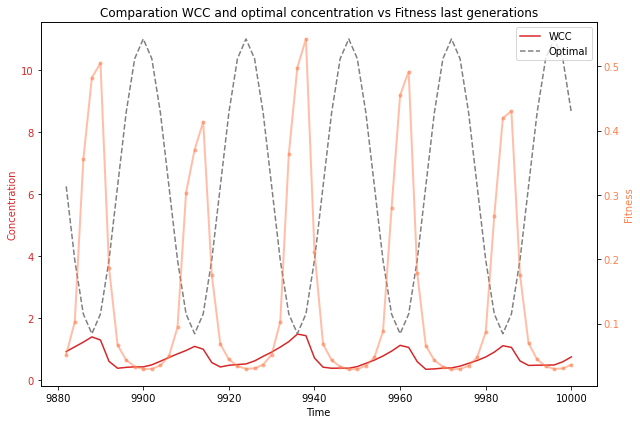

In [19]:
fig, ax1 = plt.subplots(figsize=(9,6))
time=resultA["Generation"][-60::]*2
amp = (11-1.5)/2
yd = 1.5 + amp
WCCopt = np.array(yd + amp*(np.cos(2*np.pi*(time+12)/24)))
                 #yd + amp*(np.cos(2*np.pi*(time+10)/24)),
                 #yd + amp*(np.cos(2*np.pi*(time+14)/24)),
                 #yd + amp*(np.cos(2*np.pi*(time+12)/24))-0.5,
                 #yd + amp*(np.cos(2*np.pi*(time+12)/24))+0.5])

color = 'tab:red'
#sol = solve_ivp(ODE,[9000,10000],np.ones(15))
#ax1.plot(sol.t,sol.y[5],color="green")
#ax1.set_xlim([9750,10000])
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration', color=color)
ax1.plot(time,resultA["WCC"][-60::],"-",color=color)
ax1.plot(time,WCCopt,"--",color="grey")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["WCC","Optimal"],loc="upper right")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'coral'
ax2.set_ylabel('Fitness', color=color)  # we already handled the x-label with ax1
ax2.plot(time,resultA["Fitness"][-60::],".-", color=color,alpha=0.5,linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Comparation WCC and optimal concentration vs Fitness last generations")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Result/WCC and optimal concentration vs Fitness"+files+'.jpg')
plt.show()

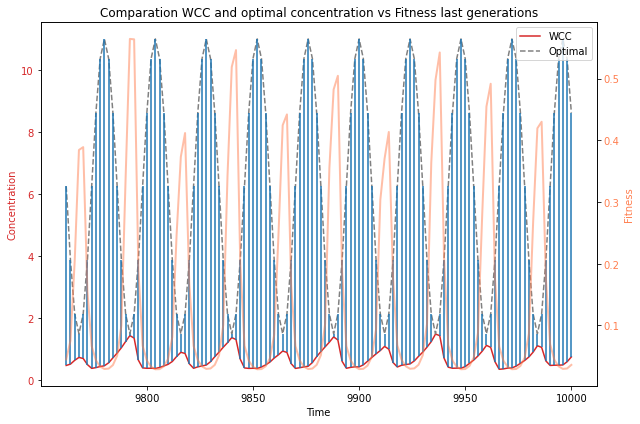

In [20]:
fig, ax1 = plt.subplots(figsize=(9,6))
time=resultA["Generation"][-120::]*2
amp = (11-1.5)/2
yd = 1.5 + amp
WCCopt = yd + amp*(np.cos(2*np.pi*(time+12)/24))

color = 'tab:red'
#sol = solve_ivp(ODE,[9000,10000],np.ones(15))
#ax1.plot(sol.t,sol.y[5],color="green")
#ax1.set_xlim([9750,10000])
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration', color=color)
ax1.plot(time,resultA["WCC"][-120::],"-",color=color)
ax1.plot(time,WCCopt,"--",color="grey")
ax1.vlines(time,WCCopt,resultA["WCC"][-120::])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["WCC","Optimal"],loc="upper right")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'coral'
ax2.set_ylabel('Fitness', color=color)  # we already handled the x-label with ax1
ax2.plot(time,resultA["Fitness"][-120::], color=color,alpha=0.5,linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Comparation WCC and optimal concentration vs Fitness last generations")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig("Result/WCC and optimal concentration vs Fitness"+files+'.jpg')
plt.show()

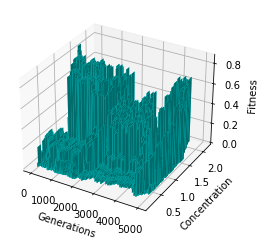

In [51]:
ax = plt.figure().add_subplot(projection='3d')
ax.bar3d(resultA["Generation"], resultA["WCC"],
         np.zeros_like(resultA["Fitness"]), 
         1, .1, resultA["Fitness"], shade = True, color="cyan")
#ax.set_ylim([0,12])
ax.set_xlabel("Generations")
ax.set_ylabel("Concentration")
ax.set_zlabel("Fitness")
plt.show()

- Graphics of the genotype parameters.

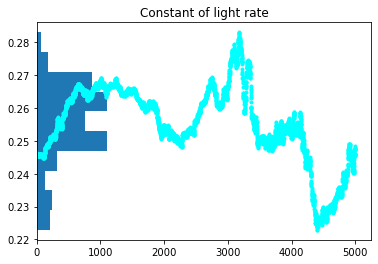

In [22]:
plt.plot(resultA["Generation"],resultA["Constant of light rate"],".",color='cyan')
plt.hist(resultA["Constant of light rate"],orientation="horizontal")
plt.scatter(np.ones_like(inLight),inLight,s=50,c="skyblue",marker="*")
plt.title("Constant of light rate")
plt.savefig("Result/Light_Ave"+files+".jpg")
plt.show()

In [23]:
ERk = [[0]*23]
for k in resultA["Expresion and repression constants"]:
    ERk = np.append(ERk,np.mat(k)[0],axis=0)
ERk = ERk[1:,:]

Dkm = [[0]*7]
for km in resultA["Disociation constants"]:
    Dkm = np.append(Dkm,np.array(np.mat(km)),axis=0)
Dkm = Dkm[1:,:]

nH = [[0]*4]
for n in resultA["Hill exponents"]:
    nH = np.append(nH,np.mat(n)[0],axis=0)
nH = nH[1:]

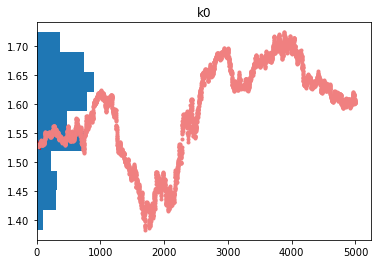

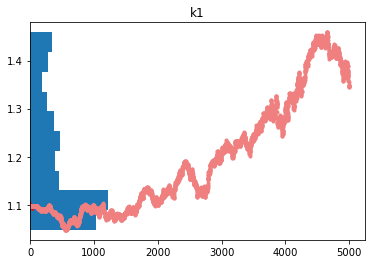

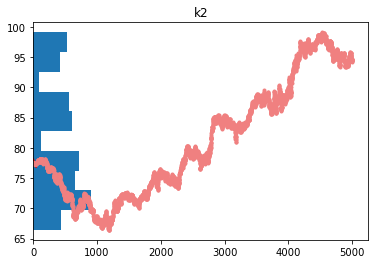

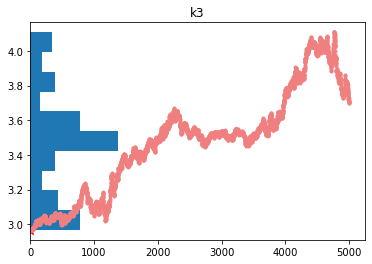

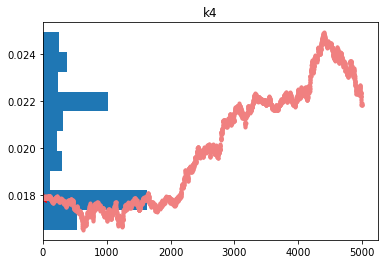

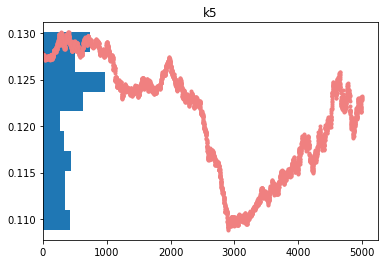

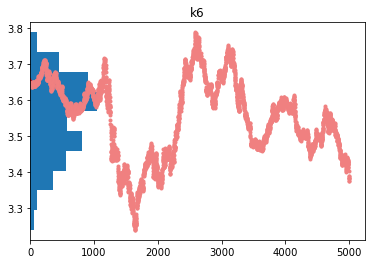

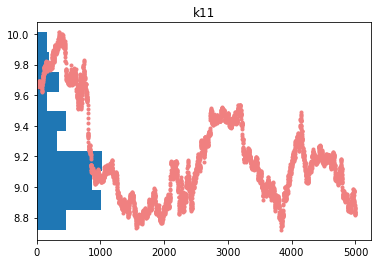

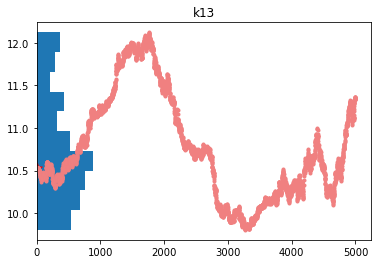

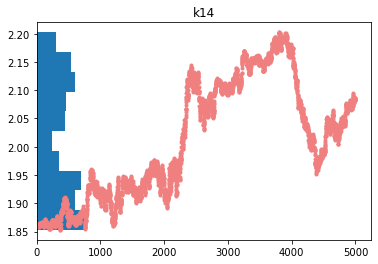

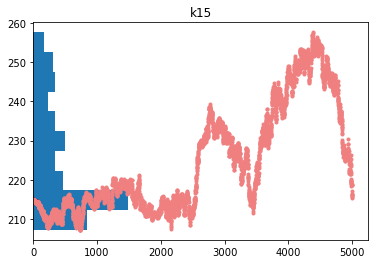

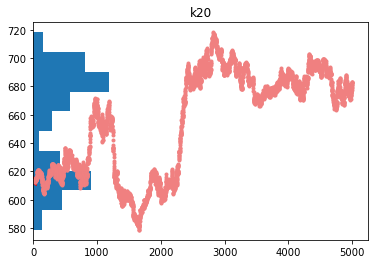

In [24]:
for i in range(0,23):
    if not i in [7,8,9,10,12,16,17,18,19,21,22]:
        plt.plot(ERk[:,i],'.',color="lightcoral")
        plt.hist(ERk[:,i],orientation="horizontal")
        for j in range(len(inER)):
            plt.scatter(1,inER[j][i],s=100,c="red",marker="*")
        plt.title("k{}".format(i))
        plt.savefig("Result/k{}_Ave{}.jpg".format(i,files))
        plt.show()

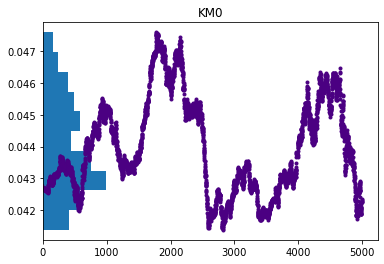

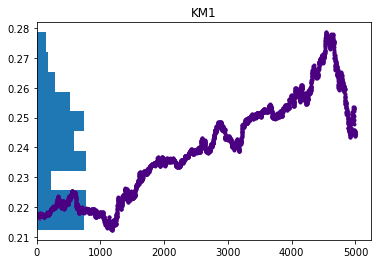

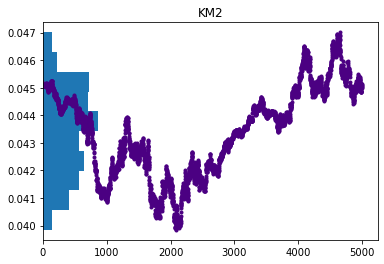

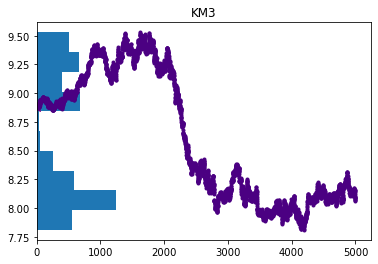

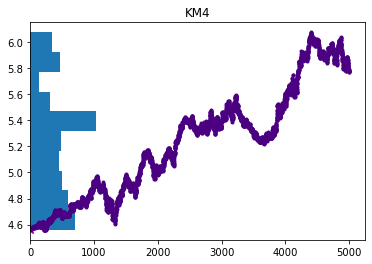

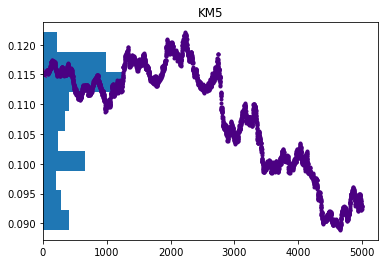

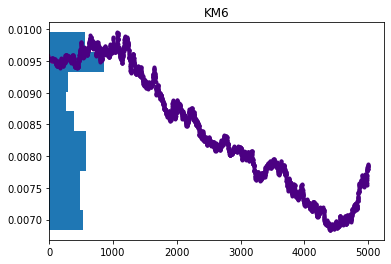

In [25]:
for i in range(0,7):
    plt.plot(Dkm[:,i],'.',color="indigo")
    plt.hist(Dkm[:,i],orientation="horizontal")
    for j in range(len(inDk)):
            plt.scatter(1,inDk[j][i],s=100,c="purple",marker="*")
    plt.title("KM{}".format(i))
    plt.savefig("Result/KM{}_Ave{}.jpg".format(i,files))
    plt.show()

In [26]:
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(resultA[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

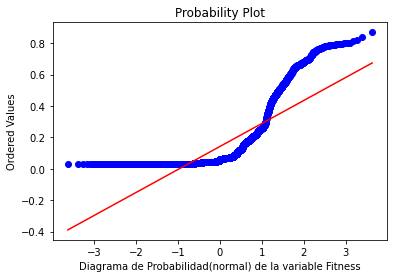

In [27]:
normalidad_variable_numerica("Fitness")

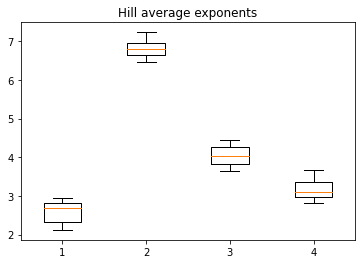

In [28]:
plt.boxplot(nH)
plt.title("Hill average exponents")
plt.savefig("Result/Hill_exp_Ave"+files+".jpg")
plt.show()

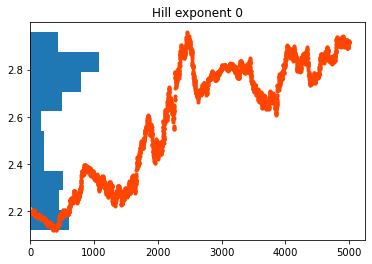

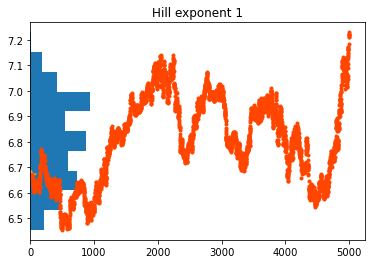

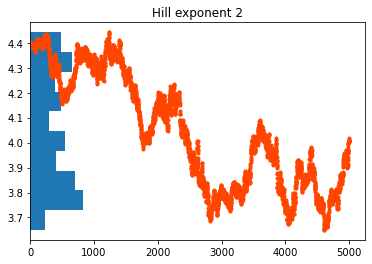

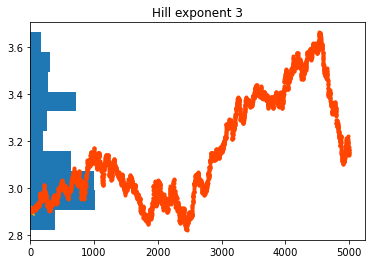

In [29]:
for i in range(0,4):
    plt.plot(nH[:,i],'.',color="orangered")
    plt.hist(nH[:,i],orientation="horizontal")
    for j in range(len(inHexp)):
            plt.scatter(15,inHexp[j][i],s=100,c="orange",marker="*")
    plt.title("Hill exponent {}".format(i))
    #plt.savefig("Result/k{}_u0.03_M1.1_st600_N1000_v0.2_LD0_alg0_0.jpg".format(i))
    plt.show()

## 3. Lineage Information
Its contain the lineage information of the populations at each cycle (24 generations or 48 hrs.).

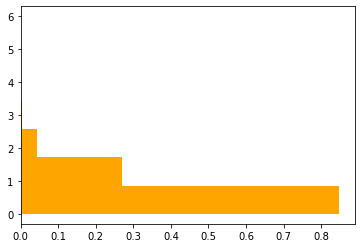

In [30]:
plt.hist(resultL["LMut"],orientation = "horizontal",range=(0,resultL["LMut"].max()+1),
         density=True,color="orange",alpha=1,bins=resultL["LMut"].max()+2,rwidth=1)
plt.show()

- Graphics the lineage mutation distribution for each cycle.

C:\Users\emman\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


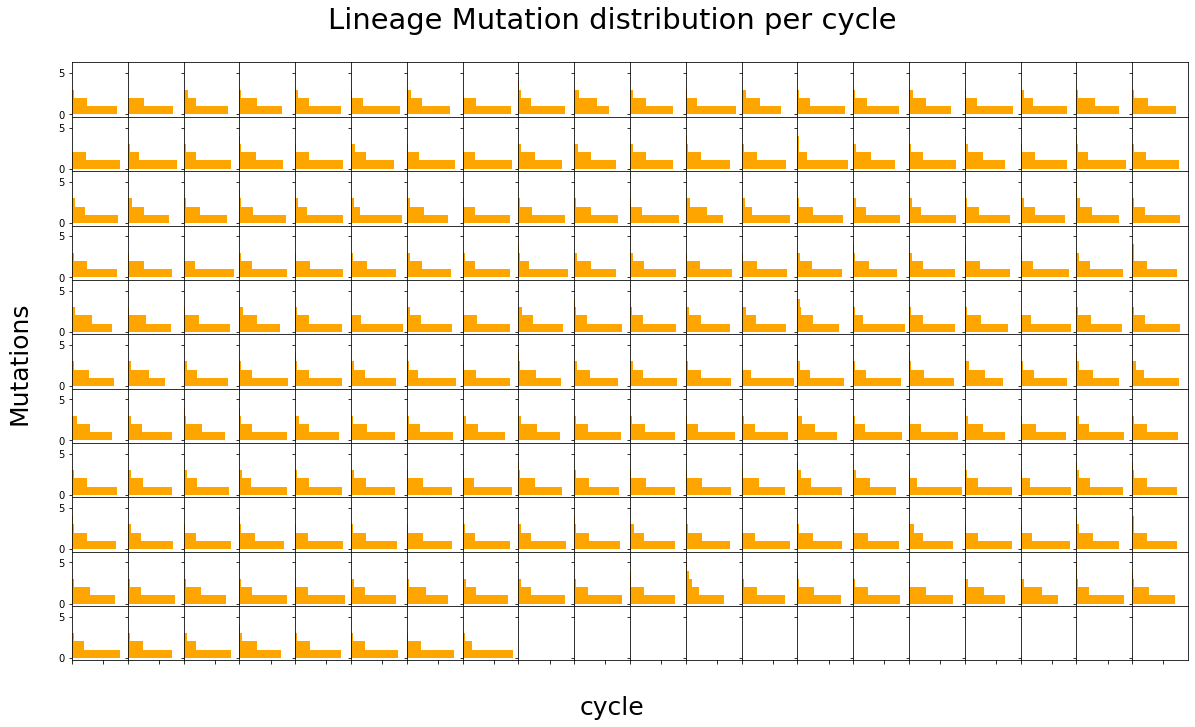

In [31]:
fig,ax =plt.subplots(s,20,sharey=True,sharex=True,figsize=(20,s))
for i in range(mx + 1):
    ax[i//20,i%20].hist(resultL["LMut"][i*N:(i+1)*N],
                        orientation = "horizontal",range=(0,resultL["LMut"].max()+1),
                        density=True,color="orange",alpha=1,bins=resultL["LMut"].max()+1)
    ax[i//20,i%20].set_xticklabels("")
    
plt.subplots_adjust(wspace=0,hspace=0)
fig.suptitle("Lineage Mutation distribution per cycle",position=(0.5,0.95),fontsize=18+s)
fig.supxlabel("cycle",position=(0.5,0.05),fontsize=14+s)
fig.supylabel("Mutations",position=(0.08,.5),fontsize=14+s)
plt.savefig("Result/Lineage_Mutations"+files+".jpg")
plt.show()

- Fitness lineage distribution like a violinplot.

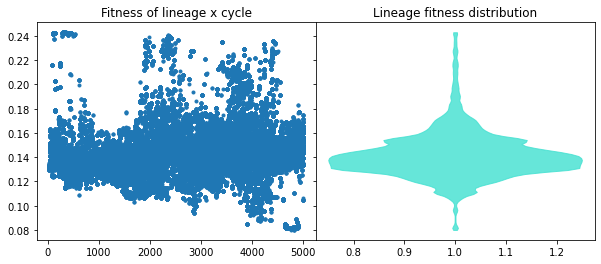

In [32]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax[0].plot(resultL["Generation"],resultL["LFit"],".")
ax[0].set_title("Fitness of lineage x cycle")
vp=ax[1].violinplot(resultL["LFit"],showextrema=False)
for body in vp['bodies']:
    body.set_color("turquoise")
    body.set_alpha(0.8)
plt.title("Lineage fitness distribution")
plt.subplots_adjust(wspace=0)
plt.savefig("Result/Lineage_Fitness"+files+".jpg")
plt.show()

- Distribution of the parents lineage of each cycle.

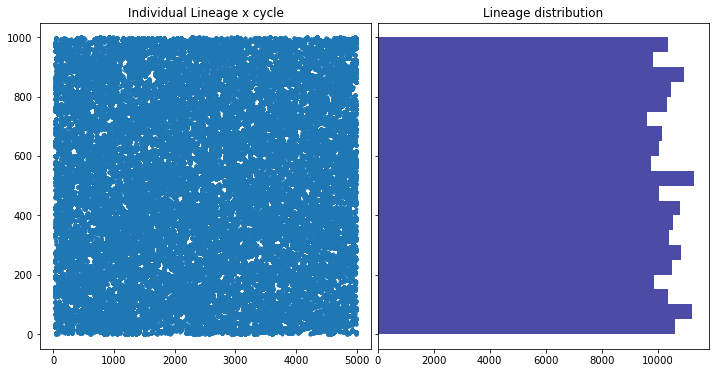

In [33]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,6))
ax[0].plot(resultL["Generation"],resultL["LTag"],".")
ax[0].set_title("Individual Lineage x cycle")
ax[1].hist(resultL["LTag"],orientation="horizontal", density = False,
           color="navy",alpha=0.7,bins=20)
#ax[1].set_xticks([0,0.0005,0.001,0.0015,0.002],labels=["0","0.0005","0.001","0.0015","0.002"])
plt.title("Lineage distribution")
plt.subplots_adjust(wspace=0.02)
plt.savefig("Result/IndividualTag"+files+".jpg")
plt.show()

C:\Users\emman\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


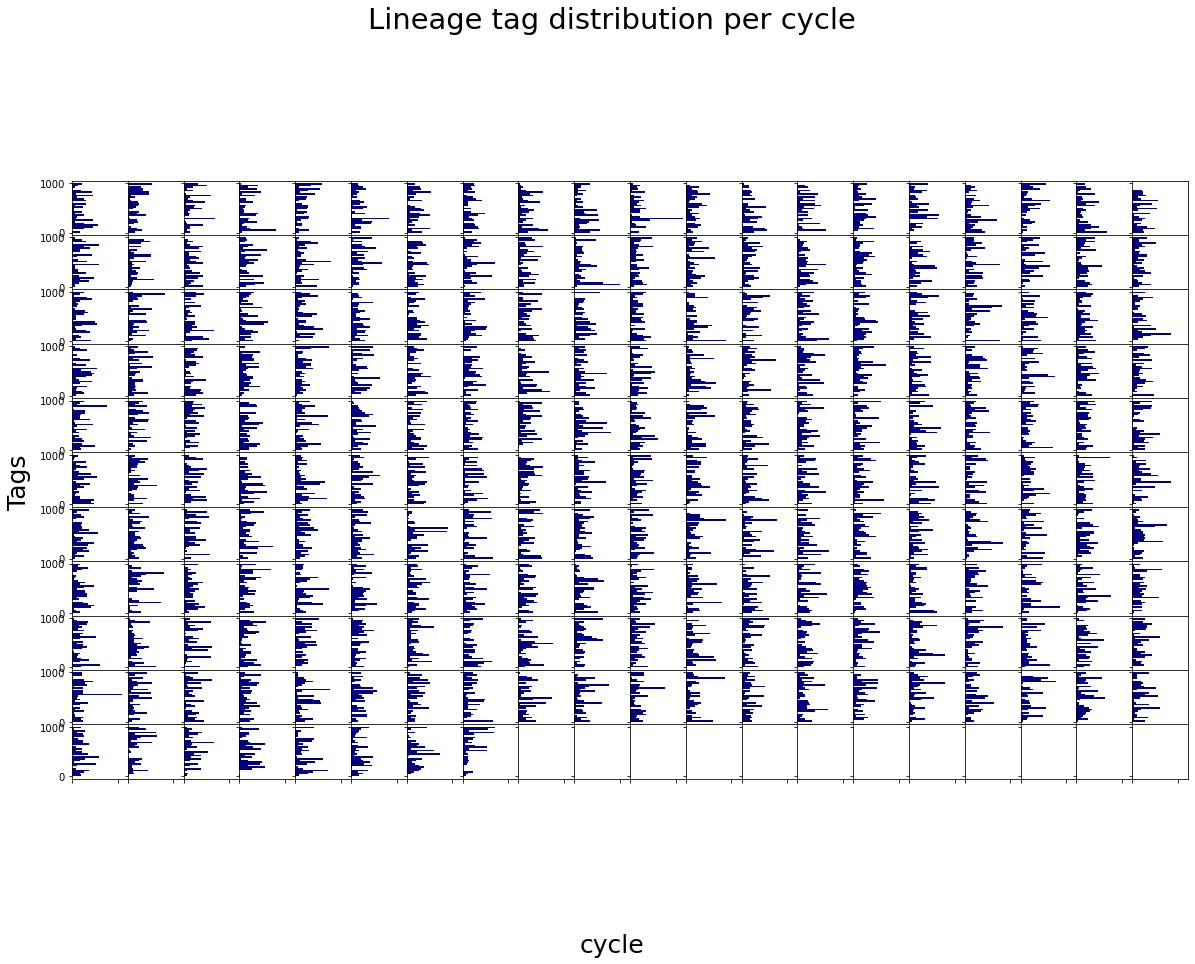

In [34]:
fig,ax =plt.subplots(s,20,sharey=True,sharex=True,figsize=(20,s))
for i in range(mx + 1):
    ax[i//20,i%20].hist(resultL["LTag"][i*N:(i+1)*N],
                        orientation = "horizontal",range=(0,N),
                        density=True,color="navy",alpha=1,bins=30)
    ax[i//20,i%20].set_xticklabels("")
    
plt.subplots_adjust(wspace=0,hspace=0)
fig.suptitle("Lineage tag distribution per cycle",position=(.5,1.1),fontsize=18+s)
fig.supxlabel("cycle",position=(0.5,-0.1),fontsize=14+s)
fig.supylabel("Tags",position=(0.08,.5),fontsize=14+s)
plt.show()

- Parameters distributions of the lineages through the cycles.

In [35]:
a=len(resultL["Expresion and repression"])
ER = [[0]*23]*a
for i in range(a):
    ER[i] = np.array(np.mat(resultL["Expresion and repression"][i]))[0]
ER = np.array(ER)
    
Dk = [[0]*7]*a
for i in range(a):
    Dk[i] = np.array(np.mat(resultL["Disociation Constants"][i]))[0]
Dk = np.array(Dk)

Hexp = [[0]*4]*a
for i in range(a):
    Hexp[i] = np.array(np.mat(resultL["Hill exponents"][i]))[0]
Hexp = np.array(Hexp)

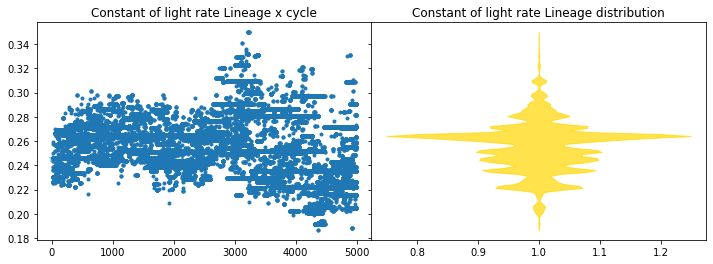

In [36]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12,4))
ax[0].plot(resultL["Generation"],resultL["Constant of light rate"],".")
ax[0].set_title("Constant of light rate Lineage x cycle")
ax[0].scatter(np.ones_like(inLight),inLight,s=50,c="skyblue",marker="*")
vp=ax[1].violinplot(resultL["Constant of light rate"],showextrema=False)
for body in vp['bodies']:
    body.set_color("gold")
    body.set_alpha(0.7)
plt.title("Constant of light rate Lineage distribution")
plt.subplots_adjust(wspace=0)
plt.savefig("Result/Light_Lin"+files+".jpg")
plt.show()

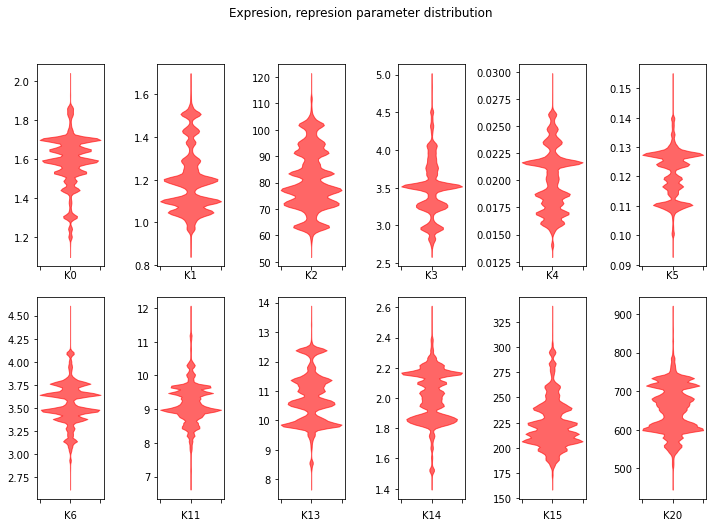

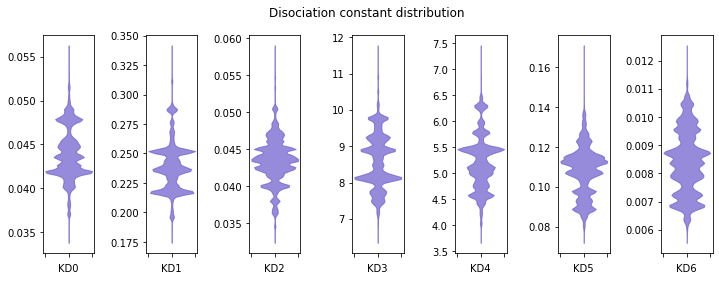

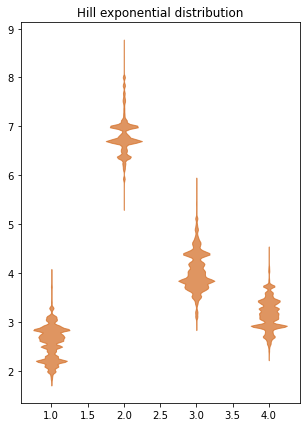

In [37]:
fig,ax=plt.subplots(2,6,figsize=(12,8),sharex=True)
for i,j in enumerate([0,1,2,3,4,5,6,11,13,14,15,20]):
    vp=ax[i//6,i%6].violinplot(ER[:,j],showextrema=False)
    vp['bodies'][0].set_color("red")
    vp['bodies'][0].set_alpha(0.6)
    ax[i//6,i%6].set_xticklabels("")
    ax[i//6,i%6].set_xlabel("K"+str(j))
plt.subplots_adjust(wspace=0.8,hspace=0.15)
fig.suptitle("Expresion, represion parameter distribution")
plt.savefig("Result/k_Lin"+files+".jpg")
plt.show()

fig,ax=plt.subplots(1,7,figsize=(12,4),sharex=True)
for i in range(7):
    vp=ax[i].violinplot(Dk[:,i],showextrema=False)
    vp['bodies'][0].set_color("slateblue")
    vp['bodies'][0].set_alpha(0.7)
    ax[i].set_xticklabels("")
    ax[i].set_xlabel("KD"+str(i))
plt.subplots_adjust(wspace=1)
fig.suptitle("Disociation constant distribution")
plt.savefig("Result/KM_Lin"+files+".jpg")
plt.show()

fig,ax=plt.subplots(1,figsize=(5,7))
vp=ax.violinplot(Hexp,showextrema=False)
for body in vp['bodies']:
    body.set_color("chocolate")
    body.set_alpha(0.7)
plt.title("Hill exponential distribution")
plt.savefig("Result/Hill_exp_Lin"+files+".jpg")
plt.show()

In [38]:
LW=np.array(resultL["WCC"])
for i in range(len(LW)):
    LW[i]= np.array(np.mat(LW[i]))[0]

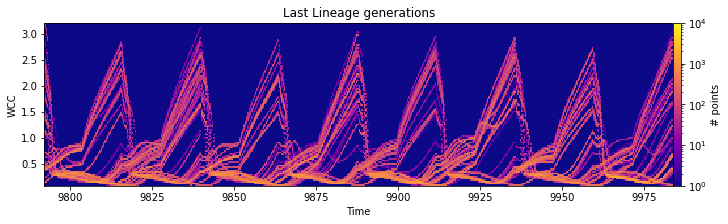

In [39]:
cycle=4
start=(mx-cycle)*48
time = cycle*48
num_fine = time*10
arr = 480
LT = np.arange(start,start+time,step=0.5)
fig, axes = plt.subplots(1, figsize=(10, 3), layout='constrained')
x_fine = list(np.linspace(start, start+time, num_fine).reshape(num_fine//arr,arr))
y_fine = np.empty((cycle*N, arr), dtype=float)
for i in range(cycle*N):
    y_fine[i, :] = np.interp(x_fine[i//N], LT[(i//N)*96:(i//N+1)*96], LW[int(start*N/48+i)])

y_fine=y_fine.flatten()
for i in range(num_fine//arr):
    x_fine[i] = np.matlib.repmat(x_fine[i], N, 1).flatten()
x_fine = np.array(x_fine).flatten()


# Plot (x, y) points in 2d histogram with log colorscale
# It is pretty evident that there is some kind of structure under the noise
# You can tune vmax to make signal more visible
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[480,100])
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmin=1,vmax=N*10), rasterized=True)
axes.set_xlabel("Time")
axes.set_ylabel("WCC")
fig.colorbar(pcm, ax=axes, label="# points", pad=0)
axes.set_title("Last Lineage generations")
#plt.ylim([9,11.25])
#plt.vlines(np.arange(LT[0]+2,LT[-1],12),0.4,11)
#plt.vlines(np.arange(LT[0]+10,LT[-1],12),0.4,11)
#plt.plot(np.arange(LT[0]+12,LT[-1],24),np.ones(20)*11,"g*")
#plt.plot(np.arange(LT[0],LT[-1],24),np.ones(20)*1.5,"g*")
plt.savefig("Result/Last Lineage generations"+files+".jpg")
plt.show()

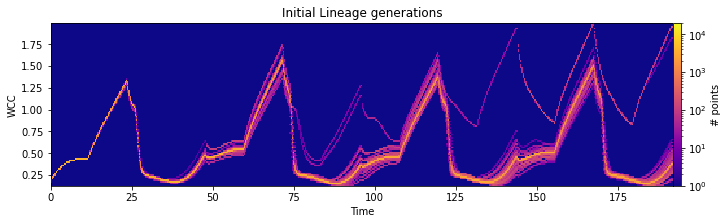

In [40]:
cycle=4
start=0
time = cycle*48
num_fine = time*10
arr = 480
LT = np.arange(start,start+time,step=0.5)

fig, axes = plt.subplots(1, figsize=(10, 3), layout='constrained')
x_fine = list(np.linspace(start, start+time, num_fine).reshape(num_fine//arr,arr))
y_fine = np.empty((cycle*N, arr), dtype=float)
for i in range(cycle*N):
    y_fine[i, :] = np.interp(x_fine[i//N], LT[(i//N)*96:(i//N+1)*96], LW[int(start*N/48+i)])
y_fine = y_fine.flatten()
for i in range(num_fine//arr):
    x_fine[i] = np.matlib.repmat(x_fine[i], N, 1).flatten()
x_fine = np.array(x_fine).flatten()


# Plot (x, y) points in 2d histogram with log colorscale
# It is pretty evident that there is some kind of structure under the noise
# You can tune vmax to make signal more visible
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[480,100])
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmin=1,vmax=N*20), rasterized=True)
axes.set_xlabel("Time")
axes.set_ylabel("WCC")
fig.colorbar(pcm, ax=axes, label="# points", pad=0)
axes.set_title("Initial Lineage generations")

plt.savefig("Result/Initial Lineage generations"+files+".jpg")
plt.show()

In [41]:
#a=len(resultL["Lm"])
#X=np.empty((a,24))
#for i in range(a):
#    X[i] = np.array(np.mat(resultL["Lm"][i].replace("nan","0")))[0]

#fig, ax = plt.subplots(4, 1, figsize=(5, 10))
#y=resultL["LOsc"]
#for i in np.unique(y):
#    ax[i].plot(
#        np.arange(0,48,2),
#        X[y == i].T, 
#        color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
#        marker    = 'o'
#    )
#    ax[i].set_title('Cluster {}'.format(i))
#plt.show()

In [42]:
#plt.hist(resultL["LOsc"],range=(0,2))
#plt.show()

In [43]:
LW=[[0]*96]
for i in range(0,1000):
    LW=np.append(LW,np.array(np.mat(resultL["WCC"][i])),axis=0)

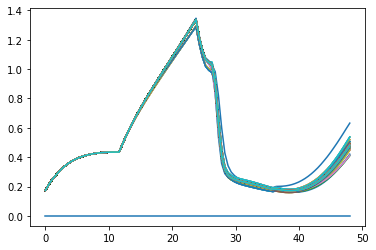

In [44]:
plt.plot(np.linspace(0,48,96),LW[:500].T,"-")
plt.show()

In [45]:
def ODE(tm,y,k0,L0,n0,K0):
    def f_m(P_1,P_2,K_m):
        return (P_1 + P_2 + K_m -  np.sqrt(pow(float(P_1 + P_2 + K_m),2) - 4*P_1*P_2))/2
            
    wc1 = y[0]
    wc2 = y[1]
    WC1 = y[2]
    WC2 = y[3]
    WCCc = y[4]
    WCCn = y[5]
    laWCC = y[6]
    frq = y[7]
    FRQ = y[8]
    FFC = y[9]
    FFCp = y[10]
    FFCn = y[11]
    vvd = y[12]
    VVDc = y[13]
    VVDn = y[14]
    
    k=k0
    L=L0
    n=n0
    K=K0
    kd=[2.4,2.5,0.135,0.085,0.05,0.05,6,2,0.27,0.27,0.27,0.27,6.2,0.24,0.24]
    
    #Tiempo y periodos LD
    m=tm%24
    if m>=12:
        l = 0
    else:
        l = L

    #Ecuaciones        
    dwc1 = k[0] + k[1]*WCCn + k[2]*laWCC - kd[0]*wc1
    dwc2 = k[3]/(1 + K[0]*WCCn) + k[4]*FFCn - kd[1]*wc2
    dWC1 = k[5]*wc1 + k[6]*f_m(wc1,FFCp,K[1]) - k[8]*WC1*WC2 - kd[2]*WC1
    dWC2 = k[7]*wc2 - kd[3]*WC2 - k[8]*WC1*WC2
    dWCCc = k[8]*WC1*WC2 - kd[4]*WCCc -  k[9]*WCCc
    dWCCn = k[9]*WCCc + k[10]*laWCC - kd[5]*WCCn - l*WCCn - k[12]*WCCn - k[11]*WCCn*(pow(FFCn,n[0])/(pow(K[2],n[0]) + pow(FFCn,n[0])))
    dlaWCC = l*WCCn + k[12]*WCCn - kd[6]*laWCC - k[10]*laWCC - k[13]*laWCC*(pow(VVDn,n[1])/(pow(K[3],n[1]) + pow(VVDn,n[1])))
    dfrq =  (k[14]*pow(float(K[5]*WCCn),n[2]) + k[15]*pow(float(K[4]*laWCC),n[2]))/(pow(float(K[4]*K[5]),n[2]) + pow(float(K[5]*WCCn),n[2]) + pow(float(K[4]*laWCC),n[2])) - kd[7]*frq
    dFRQ =  k[16]*frq - kd[8]*FRQ - k[17]*FRQ
    dFFC = k[17]*FRQ - kd[9]*FFC - k[18]*FFC
    dFFCp = k[18]*FFC - kd[10]*FFCp - k[19]*FFCp
    dFFCn = k[19]*FFCp - kd[11]*FFCn
    dvvd = (k[20]*pow(laWCC,n[3]))/(pow(K[6],n[3]) + pow(laWCC,n[3])) - kd[12]*vvd
    dVVDc = k[21]*vvd - kd[13]*VVDc -  k[22]*VVDc
    dVVDn = k[22]*VVDc - kd[14]*VVDn
    return [dwc1, dwc2, dWC1, dWC2, dWCCc, dWCCn, dlaWCC, dfrq, dFRQ, dFFC, dFFCp, dFFCn, dvvd, dVVDc, dVVDn]

C:\Users\emman\AppData\Local\Temp\ipykernel_3580\2276101347.py:42: RuntimeWarning: invalid value encountered in double_scalars
  dfrq =  (k[14]*pow(float(K[5]*WCCn),n[2]) + k[15]*pow(float(K[4]*laWCC),n[2]))/(pow(float(K[4]*K[5]),n[2]) + pow(float(K[5]*WCCn),n[2]) + pow(float(K[4]*laWCC),n[2])) - kd[7]*frq
C:\Users\emman\AppData\Local\Temp\ipykernel_3580\2276101347.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dvvd = (k[20]*pow(laWCC,n[3]))/(pow(K[6],n[3]) + pow(laWCC,n[3])) - kd[12]*vvd
C:\Users\emman\AppData\Local\Temp\ipykernel_3580\2276101347.py:42: RuntimeWarning: invalid value encountered in double_scalars
  dfrq =  (k[14]*pow(float(K[5]*WCCn),n[2]) + k[15]*pow(float(K[4]*laWCC),n[2]))/(pow(float(K[4]*K[5]),n[2]) + pow(float(K[5]*WCCn),n[2]) + pow(float(K[4]*laWCC),n[2])) - kd[7]*frq
C:\Users\emman\AppData\Local\Temp\ipykernel_3580\2276101347.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dvvd = (k[20]*pow(laWCC,n[3]))/(pow(K[6],n[3]) 

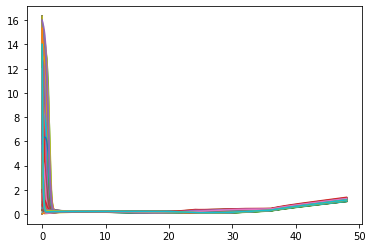

In [46]:
for i in range(500):
    sol = solve_ivp(ODE,[0,48],np.random.randint(np.zeros(15),[40., 10., 30., 10., 20., 50., 10., 30., 20., 10., 10., 10., 1200., 1430., 1430.],15)/3,
                   args=(np.array(np.mat(np.array(resultL["Expresion and repression"])[(i%100)]))[0], 
                         np.array(resultL["Constant of light rate"])[(i%100)],
                         np.array(np.mat(np.array(resultL["Hill exponents"])[(i%100)]))[0],
                         np.array(np.mat(np.array(resultL["Disociation Constants"])[(i%100)]))[0]))
    plt.plot(sol.t,sol.y[5])
plt.show()

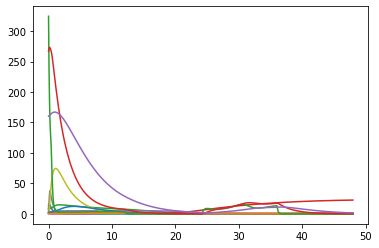

In [47]:
plt.plot(sol.t,sol.y.T)
plt.show()

In [48]:
count=0
for i in range(mx):
    c=resultL["Unnamed: 0"][i*1000:(i+1)*1000][resultL["LMut"][i*1000:(i+1)*1000]==0]
    for j in c:
        if j in np.array(resultL["LTag"][(i+1)*1000:(i+2)*1000][resultL["LMut"][(i+1)*1000:(i+2)*1000]==0]):
            count+=1
count

49

In [49]:
(np.array(np.mat(np.array(resultL["Expresion and repression"])[-1]))[0], 
                         np.array(resultL["Constant of light rate"])[-1],
                         np.array(np.mat(np.array(resultL["Hill exponents"])[-1]))[0],
                         np.array(np.mat(np.array(resultL["Disociation Constants"])[-1]))[0])

(array([1.55410319e+00, 1.24830463e+00, 9.36204283e+01, 3.31988640e+00,
        1.89392416e-02, 1.25538853e-01, 3.28123897e+00, 1.97998004e+00,
        8.91902116e-01, 3.99460912e-01, 5.40020047e-04, 8.61605837e+00,
        1.31907102e-03, 1.17886210e+01, 2.16300193e+00, 1.88945985e+02,
        4.30201083e+00, 1.16989157e-01, 1.62312295e+00, 3.05100443e-02,
        6.97930437e+02, 6.32459003e-01, 1.80697224e-01]),
 0.2716316929924685,
 array([2.91773082, 7.83324784, 4.1373493 , 3.29314728]),
 array([0.041984  , 0.21851153, 0.0442692 , 7.80199686, 5.46746299,
        0.08940149, 0.00869539]))